In [191]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings('ignore')

In [192]:
df = pd.read_csv('./Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [193]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [194]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [195]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [196]:
df["Gender"] = df["Gender"].str.strip().str.title()
df["Gender"] = df["Gender"].map({'Male': 1, 'Female': 0})
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


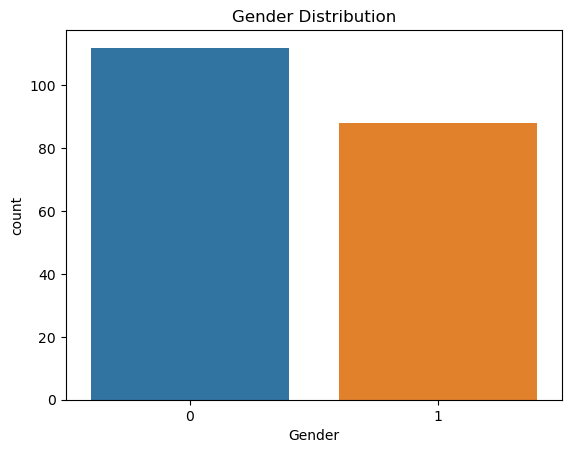

In [197]:
# Gender distribution
sns.countplot(x='Gender', data=df)
plt.title('Gender Distribution')
plt.show()

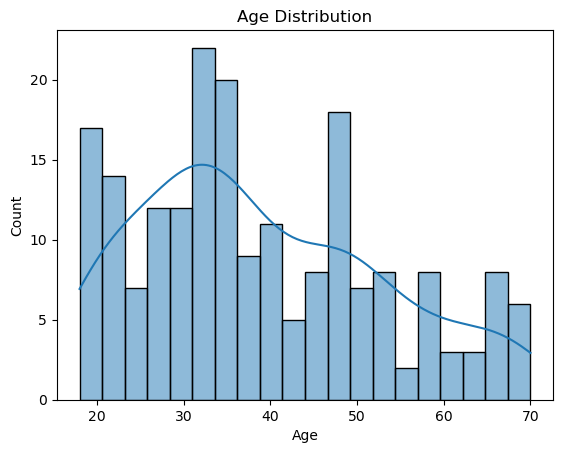

In [198]:
sns.histplot(df['Age'], kde=True, bins=20)
plt.title('Age Distribution')
plt.show()

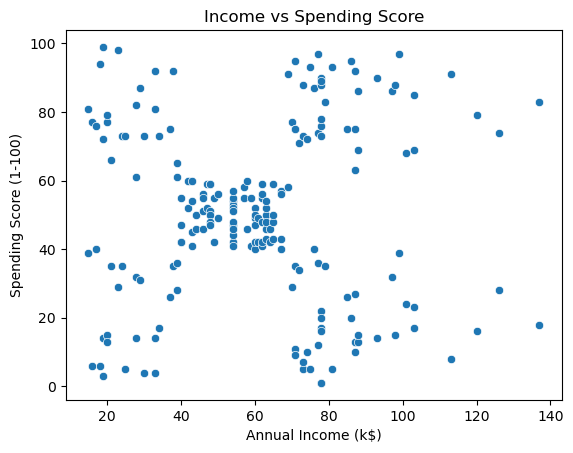

In [199]:
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=df)
plt.title('Income vs Spending Score')
plt.show()

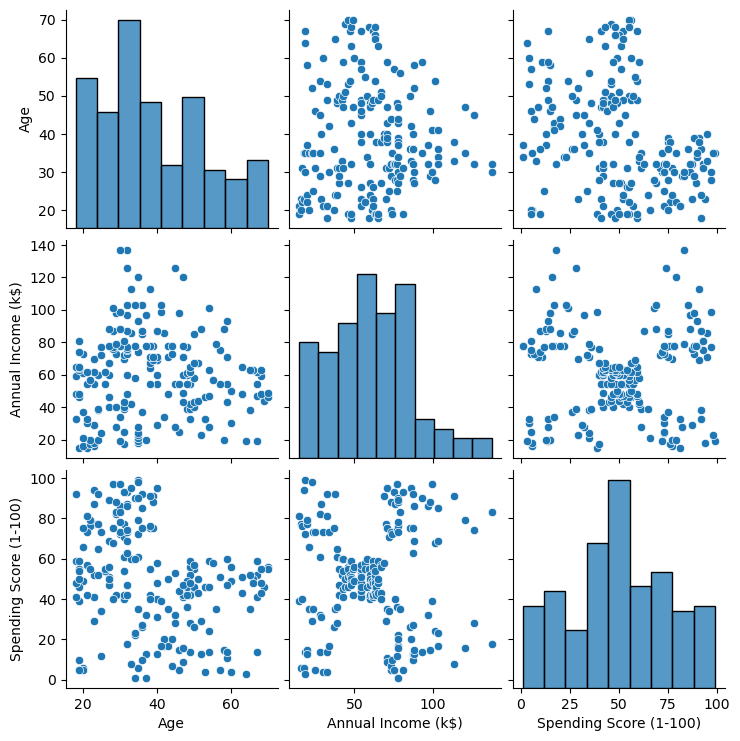

In [200]:
sns.pairplot(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])
plt.show()

In [201]:
# Features to scale
features = ['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']
scaler = StandardScaler()
scaled = scaler.fit_transform(df[features])

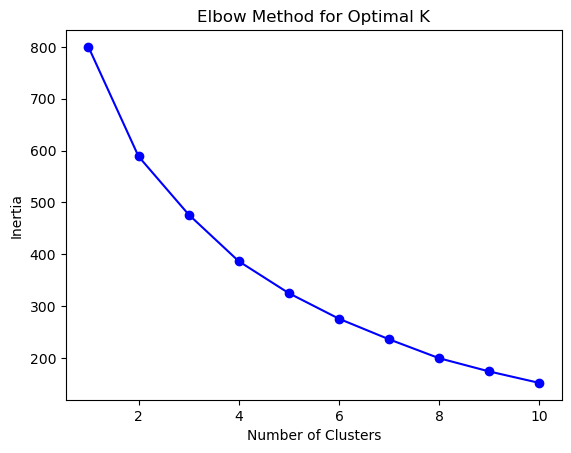

In [202]:
# Find optimal k using Elbow method
inertia = []
k_range = range(1, 11)
for k in k_range:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(scaled)
    inertia.append(km.inertia_)

# Plot elbow
plt.plot(k_range, inertia, 'bo-')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()



In [203]:
customer_id = df['CustomerID']
features = df.drop(columns = ['CustomerID',"Gender"])
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)
scaled_df = pd.DataFrame(scaled_features, columns=features.columns)
print(scaled_df)

          Age  Annual Income (k$)  Spending Score (1-100)
0   -1.424569           -1.738999               -0.434801
1   -1.281035           -1.738999                1.195704
2   -1.352802           -1.700830               -1.715913
3   -1.137502           -1.700830                1.040418
4   -0.563369           -1.662660               -0.395980
..        ...                 ...                     ...
195 -0.276302            2.268791                1.118061
196  0.441365            2.497807               -0.861839
197 -0.491602            2.497807                0.923953
198 -0.491602            2.917671               -1.250054
199 -0.635135            2.917671                1.273347

[200 rows x 3 columns]


In [204]:
silhouettescore = []

for k in range(2,11):
    kmeans = KMeans(n_clusters = k, n_init = 10, random_state = 42)
    kmeans.fit(scaled_df)
    silhouettescore.append(silhouette_score(scaled_df,kmeans.labels_))
    print(f"k = {k}, Silhouette Score = {round(silhouette_score(scaled_df,kmeans.labels_),4)}")

k = 2, Silhouette Score = 0.3355
k = 3, Silhouette Score = 0.3578
k = 4, Silhouette Score = 0.404
k = 5, Silhouette Score = 0.4166
k = 6, Silhouette Score = 0.4284
k = 7, Silhouette Score = 0.4112
k = 8, Silhouette Score = 0.4084
k = 9, Silhouette Score = 0.4201
k = 10, Silhouette Score = 0.4226


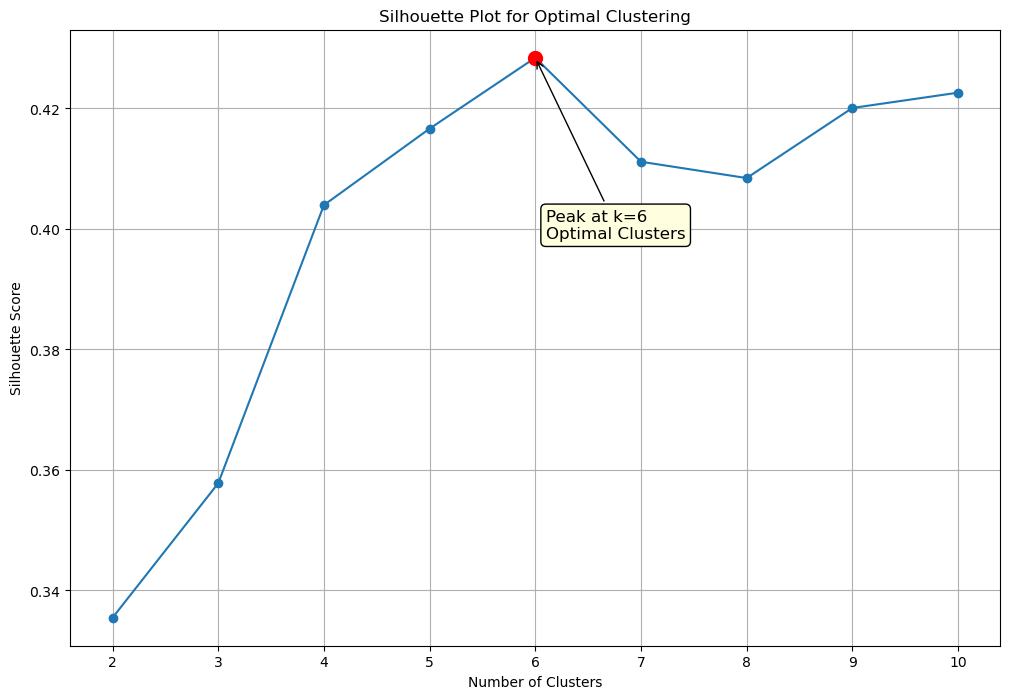

In [205]:
plt.figure(figsize=(12, 8))
plt.plot(range(2, 11), silhouettescore, marker='o')
max_idx = silhouettescore.index(max(silhouettescore))
peak_k = range(2, 11)[max_idx]
peak_score = silhouettescore[max_idx]
plt.plot(peak_k, peak_score, 'ro', markersize=10)
plt.annotate(f'Peak at k={peak_k}\nOptimal Clusters',
             xy=(peak_k, peak_score),
             xytext=(peak_k + 0.1, peak_score - 0.03),
             arrowprops=dict(arrowstyle='->', color='black'),
             bbox=dict(boxstyle='round,pad=0.3', edgecolor='black', facecolor='lightyellow'),
             fontsize=12)
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Plot for Optimal Clustering")
plt.xticks(range(2, 11))
plt.grid()
plt.show()

In [206]:
kmeans6 = KMeans(n_clusters = 6, n_init = 10, random_state = 42)
kmeans6.fit(scaled_df)
labels = np.array(kmeans6.labels_)
labels_df = pd.DataFrame(labels, columns=['labels'])
labelled_df = pd.concat([df, labels_df], axis=1)
grouped_df = labelled_df.drop(columns = ['CustomerID','Gender']).groupby(labels)
grouped_df.agg({
    'Age': ['mean', 'std','count'],
    'Annual Income (k$)': ['mean', 'std','count'],
    'Spending Score (1-100)' : ['mean', 'std','count']}).round(2)

Age              Annual Income (k$)              Spending Score (1-100)  \
    mean    std count               mean    std count                   mean   
0  25.00   5.30    23              25.26   7.72    23                  77.61   
1  56.33   8.45    45              54.27   8.98    45                  49.07   
2  41.94  10.18    33              88.94  16.59    33                  16.97   
3  26.79   7.06    39              57.10  10.16    39                  48.13   
4  32.69   3.73    39              86.54  16.31    39                  82.13   
5  45.52  11.77    21              26.29   7.44    21                  19.38   

                
     std count  
0  13.27    23  
1   6.30    45  
2   9.96    33  
3   9.97    39  
4   9.36    39  
5  12.56    21

In [207]:
import plotly.express as px

fig = px.scatter_3d(
    labelled_df,
    x='Age',
    y='Annual Income (k$)',
    z='Spending Score (1-100)',
    color=labelled_df['labels'].astype(str), 
    title="Customer Segments (3D)",
    labels={'color': 'Cluster'}
)

fig.update_traces(marker=dict(size=5))  
fig.show()

In [208]:
# Apply DBSCAN
dbscan = DBSCAN(eps=1.4, min_samples=5)
labelled_df['DBSCAN_Segment'] = dbscan.fit_predict(scaled)

# Silhouette Score (excluding noise -1)
dbscan_labels = labelled_df['DBSCAN_Segment']
if len(set(dbscan_labels)) > 1 and -1 in dbscan_labels.values:
    dbscan_score = silhouette_score(scaled[dbscan_labels != -1], dbscan_labels[dbscan_labels != -1])
    print("DBSCAN Silhouette Score (excluding noise):", round(dbscan_score, 4))
else:
    print("DBSCAN clustering ineffective (all noise or one cluster).")

noise_points = np.sum(labelled_df["DBSCAN_Segment"] == -1)
print("Number of noise points:", noise_points)

DBSCAN Silhouette Score (excluding noise): 0.279
Number of noise points: 1


In [209]:
# Group by DBSCAN clusters
dbscan_summary = labelled_df.groupby('DBSCAN_Segment').agg({
    'Age': ['mean', 'std', 'count'],
    'Annual Income (k$)': ['mean', 'std', 'count'],
    'Spending Score (1-100)': ['mean', 'std', 'count']
})

# Round values for cleaner display
dbscan_summary = dbscan_summary.round(2)

# Display the summary table
print(dbscan_summary)

                  Age              Annual Income (k$)               \
                 mean    std count               mean    std count   
DBSCAN_Segment                                                       
-1              30.00    NaN     1             137.00    NaN     1   
 0              39.92  15.57    87              61.37  25.54    87   
 1              38.10  12.64   112              59.25  26.01   112   

               Spending Score (1-100)               
                                 mean    std count  
DBSCAN_Segment                                      
-1                              83.00    NaN     1  
 0                              48.11  27.81    87  
 1                              51.53  24.11   112  


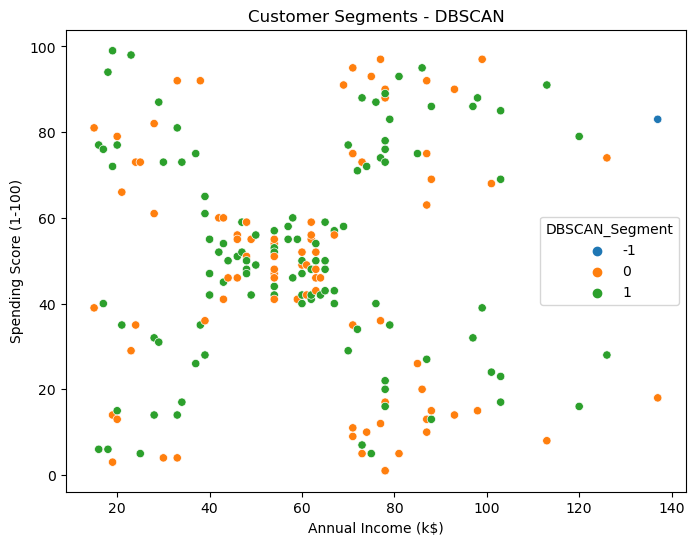

In [210]:
# DBSCAN Cluster Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='DBSCAN_Segment', data=labelled_df, palette='tab10')
plt.title('Customer Segments - DBSCAN')
plt.show()

In [211]:
labelled_df.to_csv("segmented_customers_kmeans_dbscan.csv", index=False)